In [459]:
import numpy as np
def lib_svd(A, verbose=0):
    U, S, V = np.linalg.svd(A, full_matrices=True)

    m = A.shape[0]
    n = A.shape[1]

    Sigma = np.zeros((A.shape[0], A.shape[1]))
    Sigma[:n, :n] = np.diag(S)
    S = Sigma

    assert np.allclose(A, U @ (S @ V))
    assert U.shape == (m, m)
    assert V.shape == (n, n)
    assert S.shape == (m, n)

    np.set_printoptions(precision=4, suppress=True)
    if verbose:
        print("rank(A) = {}".format(np.linalg.matrix_rank(A)))
        print("2-norm(A) = {}".format(np.linalg.norm(A, 2)))
        print("Frobenius-norm(A) = {}".format(np.linalg.norm(A, "fro")))
        print("k_2(A) = {}".format(np.linalg.cond(A, 2)))
        print("A+ =", *np.linalg.pinv(A), sep="\n")
        print("A =", *A, sep="\n")
        print("U =", *U, sep="\n")
        print("S =", *S, sep="\n")
        print("V =", *V, sep="\n")
    return U, S, V

# Computing the SVD decomposition


In [484]:
sinvals_1 = np.array([0,2])
sinvals_1 = sinvals_1[np.argsort(-sinvals_1, axis=0)]
sinvals_1

array([2, 0])

In [564]:
def manual_svd(A):
    m = A.shape[0]
    n = A.shape[1]
    H = np.zeros((m+n,m+n))
    H[n:,:n] = A
    H[:n,n:] = A.T
    eigvals_1, eigvecs_1 = np.linalg.eig(A.T@A)
    eigvals_2, eigvecs_2 = np.linalg.eig(A@A.T)
    sinvals_1 = np.sqrt(eigvals_1[eigvals_1>0])
    sinvals_2 = np.sqrt(eigvals_2[eigvals_2>0])

    V = eigvecs_1[:,np.argsort(-sinvals_1, axis=0)]
#     U = eigvecs_2
    U = np.eye(m, m)
    U[:m,:n] = eigvecs_2[:,np.argsort(-sinvals_2, axis=0)]
    sinvals_1 = sinvals_1[np.argsort(-sinvals_1, axis=0)]
    sinvals_2 = sinvals_2[np.argsort(-sinvals_2, axis=0)]
    Sigma = np.zeros((A.shape[0], A.shape[1]))
    for key, val in enumerate(sinvals_2):
        Sigma[key,key] = val
    S = Sigma
    V = V*np.sign(eigvals_1)[...,None,:]
    return U,S,V.T

A = np.array([[1,2,3],[4,5,6]])
_ = manual_svd(A)

ValueError: operands could not be broadcast together with shapes (3,2) (1,3) 

In [551]:
def manual_svd(A):
    m = A.shape[0]
    n = A.shape[1]
    H = np.zeros((m+n,m+n))
    H[n:,:n] = A
    H[:n,n:] = A.T
    eigvals_1, eigvecs_1 = np.linalg.eig(A.T@A)
    eigvals_2, eigvecs_2 = np.linalg.eig(A@A.T)
    sinvals_1 = np.sqrt(eigvals_1[eigvals_1>0])
    sinvals_2 = np.sqrt(eigvals_2[eigvals_2>0])

    V = eigvecs_1[:,np.argsort(-sinvals_1, axis=0)]
#     U = eigvecs_2
    U = np.eye(m, m)
    U[:m,:n] = eigvecs_2[:,np.argsort(-sinvals_2, axis=0)]
    sinvals_1 = sinvals_1[np.argsort(-sinvals_1, axis=0)]
    sinvals_2 = sinvals_2[np.argsort(-sinvals_2, axis=0)]
    Sigma = np.zeros((A.shape[0], A.shape[1]))
    for key, val in enumerate(sinvals_2):
        Sigma[key,key] = val
    S = Sigma
    return U,S,V.T

A = np.array([[1,2,3],[4,5,6]])
_ = manual_svd(A)

In [557]:
import matplotlib.pyplot as plt


def plot_dif(U, _U):

    plt.subplot(131)
    plt.imshow(U, vmin=-1, vmax=1)

    plt.subplot(132)
    plt.imshow(_U, vmin=-1, vmax=1)

    plt.subplot(133)
    plt.imshow(abs(U - _U) > 10e-8, vmin=-1, vmax=1)
    plt.show()

[0.2691 0.6798 0.6822]
[-0.962   0.1557  0.2243]
[ 0.0463 -0.7167  0.6959]

[-0.2691 -0.6798  0.6822]
[ 0.962  -0.1557  0.2243]
[-0.0463  0.7167  0.6959]


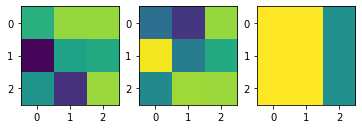

In [558]:
A = np.array([[5,5],[-1,7]])
A = np.array([[-149, -50, -154], [537, 180, 546],[-27, -9, -25]])
# A = np.array([[2,1,0,0],[4,3,0,0]]).T
# A = np.random.randn(6,6)
U,S,Vt = manual_svd(A)
_U,_S,_Vt = lib_svd(A)
# print(U,S,Vt, sep='\n')
# print(_U,_S,_Vt,sep='\n')
# assert np.array_equal(_U,U)
# assert np.array_equal(_S,S)
# assert np.array_equal(_Vt,Vt)

print(*U, sep='\n', end='\n\n')
print(*_U,sep='\n')
plot_dif(U, _U)

[0.6823 0.     0.    ]
[ 0.      0.1937 -0.    ]
[ 0.     -0.      0.0204]

[0.6823 0.2287 0.6944]
[-0.6671 -0.1937  0.7193]
[ 0.299  -0.954   0.0204]



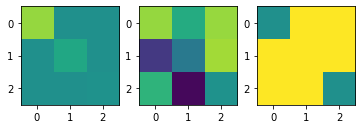

In [559]:
print(*Vt, sep='\n', end='\n\n')
print(*_Vt, sep='\n', end='\n\n')
plot_dif(Vt, _Vt)

[817.7597   0.       0.    ]
[0.    2.475 0.   ]
[0.    0.    0.003]

[817.7597   0.       0.    ]
[0.    2.475 0.   ]
[0.    0.    0.003]



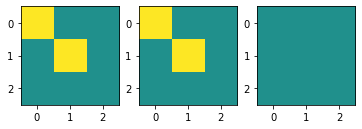

In [560]:
print(*S, sep='\n', end='\n\n')
print(*_S, sep='\n', end='\n\n')

plot_dif(S, _S)